## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [1]:
%pylab inline
data_dir = "./Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [2]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 77.8M    0  197k    0     0   263k      0  0:05:02 --:--:--  0:05:02  268k
  1 77.8M    1 1562k    0     0   885k      0  0:01:30  0:00:01  0:01:29  893k
  5 77.8M    5 4226k    0     0  1536k      0  0:00:51  0:00:02  0:00:49 1545k
  9 77.8M    9 7698k    0     0  2044k      0  0:00:39  0:00:03  0:00:36 2052k
 14 77.8M   14 11.2M    0     0  2420k      0  0:00:32  0:00:04  0:00:28 2428k
 18 77.8M   18 14.4M    0     0  2577k      0  0:00:30  0:00:05  0:00:25 2924k
 23 77.8M   23 18.6M    0     0  2824k      0  0:00:28  0:00:06  0:00:22 3510k
 28 77.8M   28 22.2M    0     0  2935k      0  0:00:27  0:00:07  0:00:20 3705k
 33 77.8M   33 25.9M    0     0  3028k      0  0:00:26  0:00:08  0:00:18 3768k
 38 77.8M   38 29.7M    0     0  3122k      0  0:00

### Get the statistics from the Pickle File

In [3]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [4]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [5]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [6]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas ".\Data\Weather\ghcnd-readme.txt"
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [7]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7),color=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-',color=color);
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(DateFormatter('%b\n %y'))
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low1000 and high1000
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

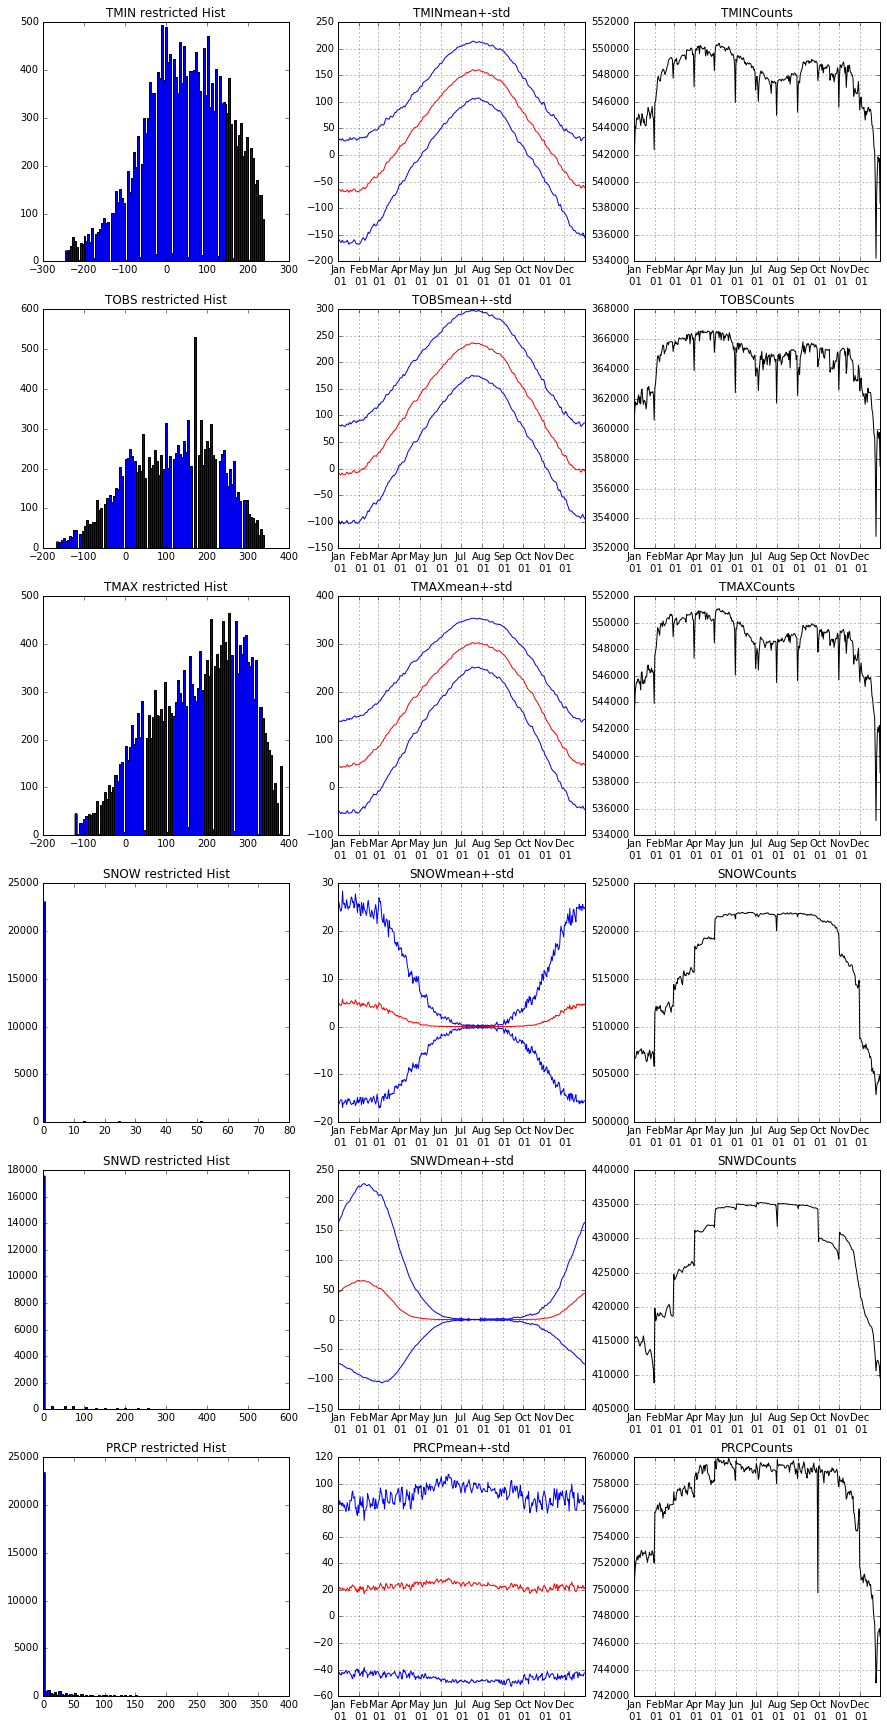

In [8]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    vals = []
    low100 = STAT[meas]['low100']
    high100 = STAT[meas]['high100']
    [vals.append(i) if (i >= STAT[meas]['low100']) & (i <= STAT[meas]['high100']) else np.nan for i in STAT[meas]['SortedVals']]
    plt.title(meas+' restricted Hist')
    plt.hist(vals,bins=100,color='blue')
    subplot(6,3,offset)
    offset+=1
    ttl=meas+"mean+-std"
    YearlyPlots(STAT[meas]['Mean'],color='r')
    YearlyPlots(STAT[meas]['Mean']+np.sqrt(STAT[meas]['Var']),color='b')
    YearlyPlots(STAT[meas]['Mean']-np.sqrt(STAT[meas]['Var']),ttl,color='b')
    subplot(6,3,offset)
    offset+=1
    ttl=meas+"Counts"
    YearlyPlots(STAT[meas]['NE']-np.sqrt(STAT[meas]['Var']),ttl,color='k')

### Plot the Number of measurements recorded each day for TMAX

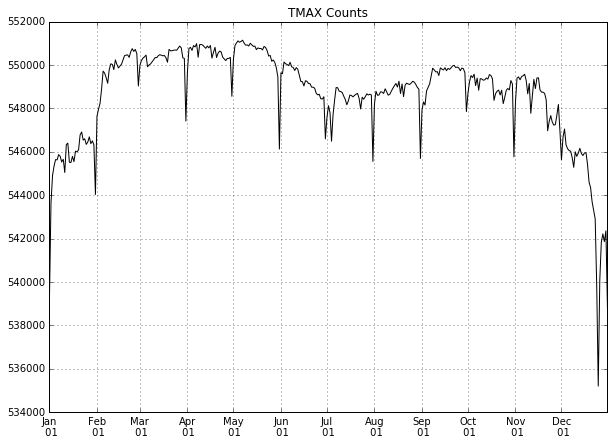

In [9]:
## Your code here
ttl='TMAX'+" Counts"
YearlyPlots(STAT['TMAX']['NE'],ttl,color='k')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


#    Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

    The lower count could be because of scheduled maintenance at the end of the month across majority of the stations. 
    So our hypothesis is every year the same pattern is being followed and hence we are seeing missing data. 
    To find out let download the tmax and snwd pickle to see if our hypothesis is correct with tmax for all years
    
    The best way to handle this is to apply the mean value of the December month and apply it to the end of the year. 
    Also we can apply the mean of the month and apply that to the last day of the month

### Instructor comments

It was great to see that you stated a hypothesis and suggested a way to test it. However, I don't see any evidence that you did this test and that you drew conclusions from it.

5 extra credit points.

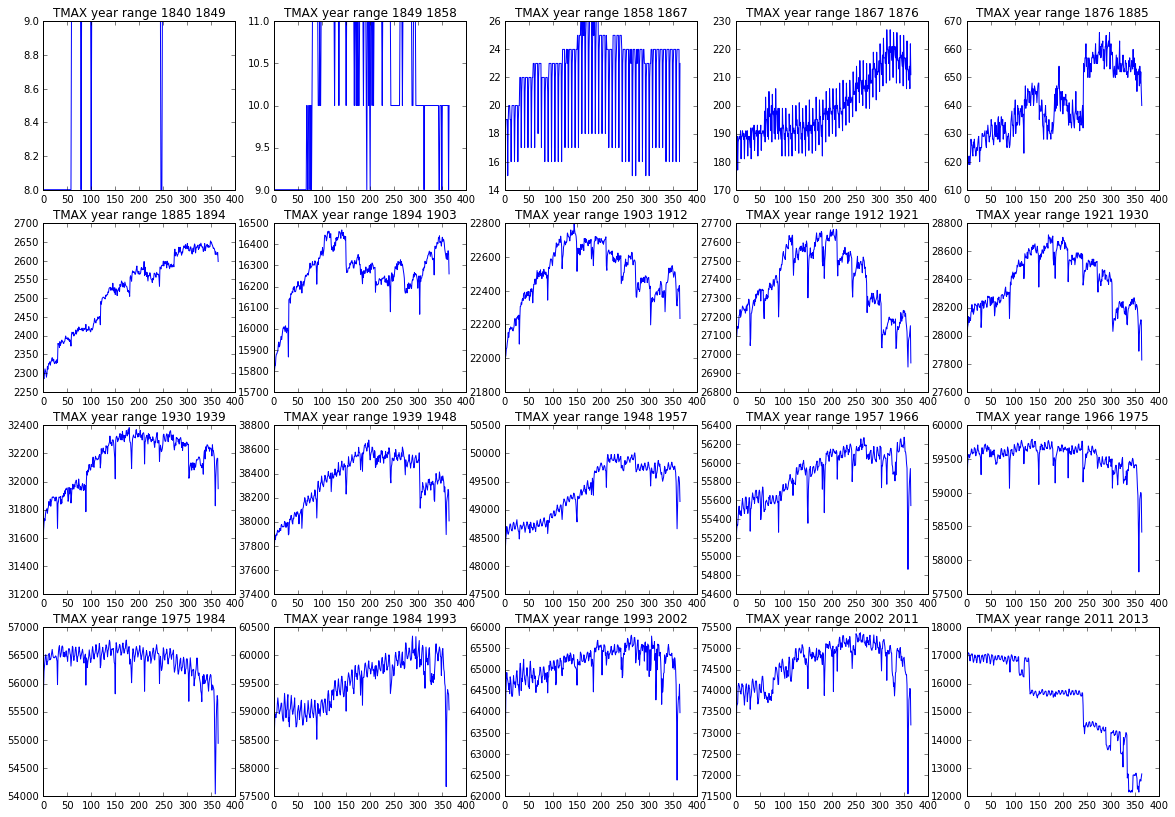

In [91]:
import pandas as pd
tmax_all_years = pickle.load(open(data_dir + 'tmax_all_years.pickle','r'))
tmax_year = pd.DataFrame({year:counts for year, counts in tmax_all_years}, index=range(1, 366)).T
ran = []
for i in range(0,len(tmax_year),9):
    ran.append(i)
ran.append(len(tmax_year)-1)
num_cols = 5
num_rows = 5

fig = plt.figure(figsize=(num_cols * 4, 3.5 * num_rows))
for i in range(0,len(ran)-1):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    ttl = "TMAX year range " + str(int(tmax_year.index[ran[i]]))+" "+str(int(tmax_year.index[ran[i+1]]))
    ax.set_title(ttl)
    ax.plot(tmax_year.iloc[ran[i]:ran[i+1]].sum().values)


# Can you Explain the counts per day for "SNWD" ?
    1. For SNWD the counts increase first of every month as the temperature soars.
    2. The measurements are uniform between may and october as there is little to no snow during summer.
    3. The measurements were also very lesser before 1940s as against after that.
    4. Snow depth is measured easily in few places while some of the places it could be really tough and need special equipments.

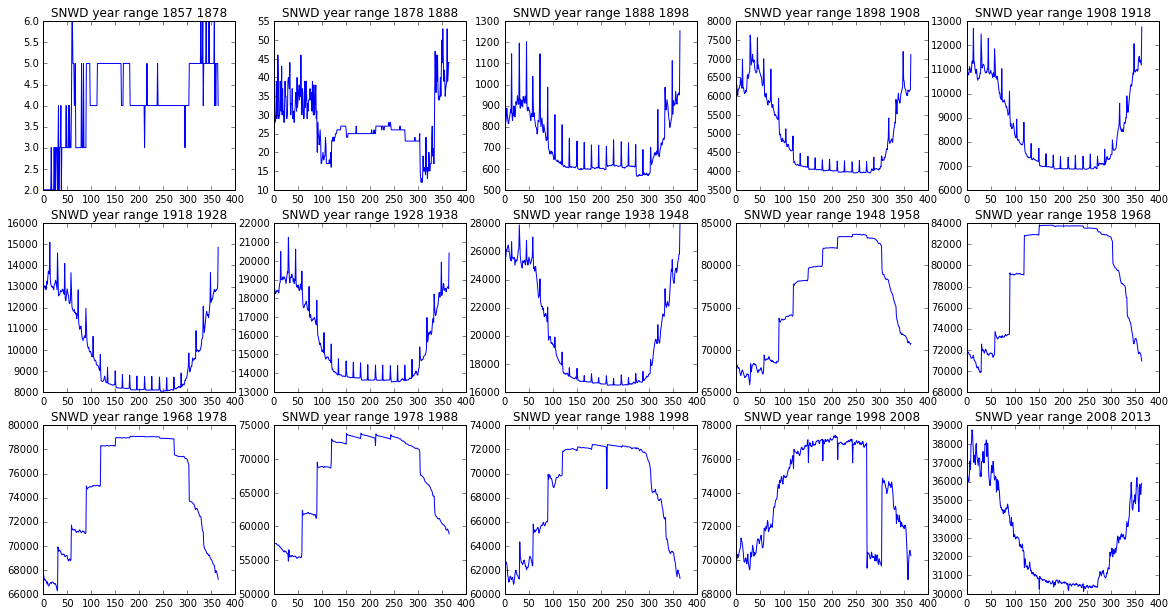

In [89]:
snwd = pickle.load(open(data_dir + 'snwd_all_years.pickle','r'))
snwd_year = pd.DataFrame({year:counts for year, counts in snwd}, index=range(1, 366)).T
snwd_year
ran = []
for i in range(0,len(snwd_year),10):
    ran.append(i)
ran.append(len(snwd_year)-1)
ran
num_cols = 5
num_rows = 5

fig = plt.figure(figsize=(num_cols * 4, 3.5 * num_rows))
for i in range(0,len(ran)-1):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    ttl = "SNWD year range " + str(int(snwd_year.index[ran[i]]))+" "+str(int(snwd_year.index[ran[i+1]]))
    ax.set_title(ttl)
    ax.plot(snwd_year.iloc[ran[i]:ran[i+1]].sum().values)


### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

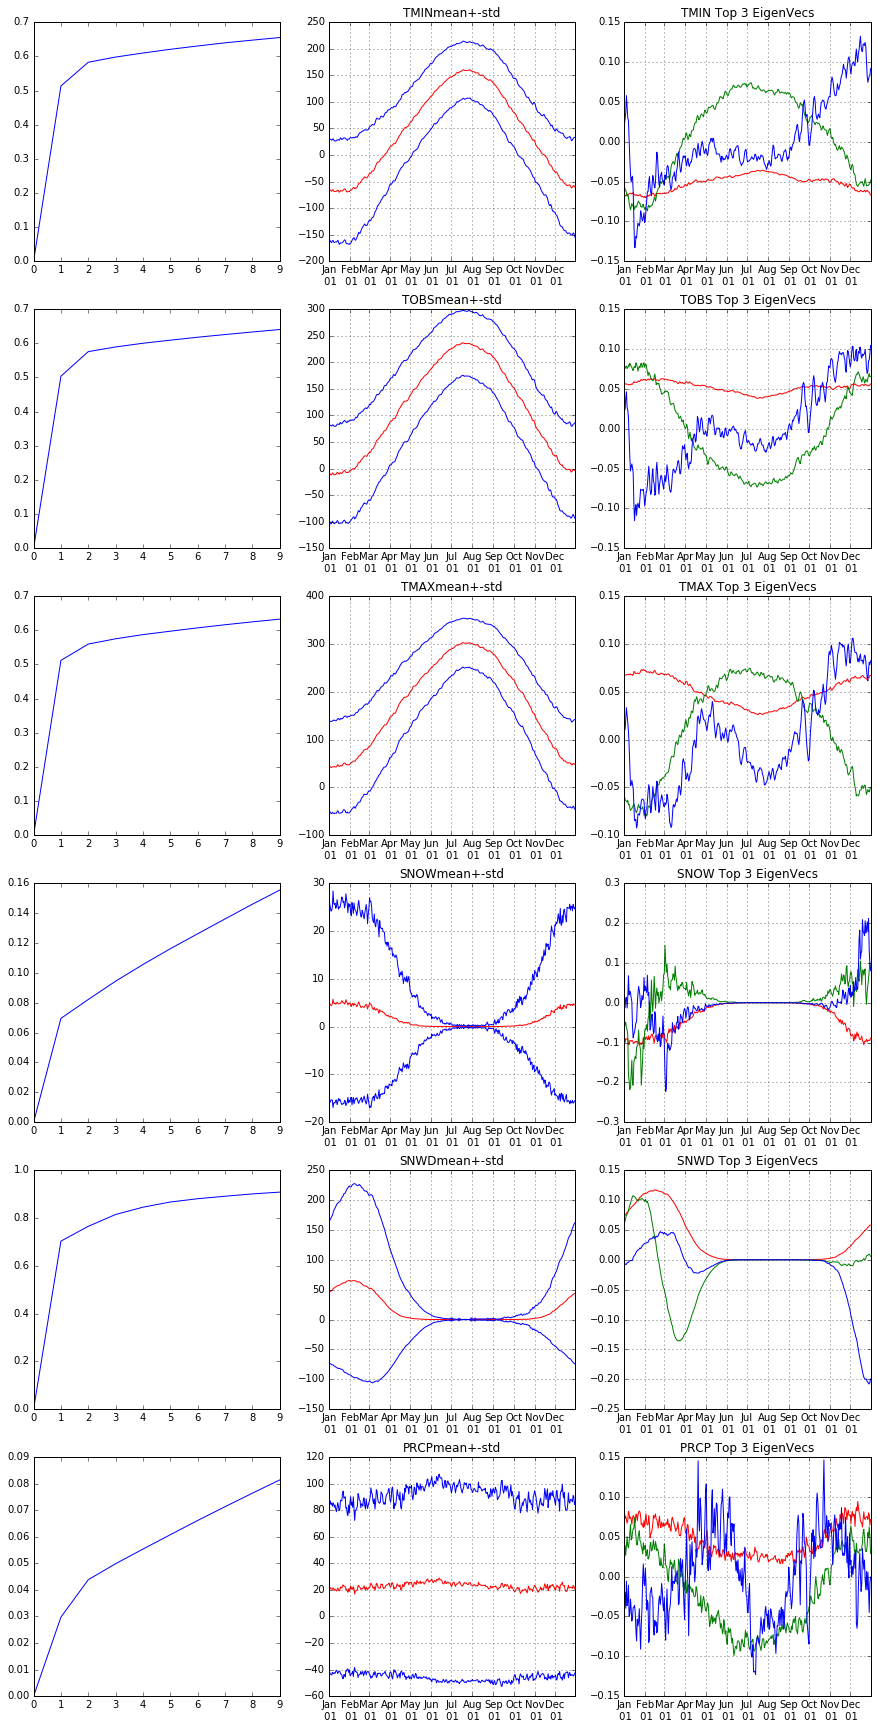

In [10]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    plt.plot(np.append(0,sort(STAT[meas]['eigval'])[-9:][::-1].cumsum()/sum(STAT[meas]['eigval'])))
    subplot(6,3,offset)
    offset+=1
    ttl=meas+"mean+-std"
    YearlyPlots(STAT[meas]['Mean'],color='r')
    YearlyPlots(STAT[meas]['Mean']+np.sqrt(STAT[meas]['Var']),color='b')
    YearlyPlots(STAT[meas]['Mean']-np.sqrt(STAT[meas]['Var']),ttl,color='b')
    subplot(6,3,offset)
    offset+=1
    ttl= meas+" Top 3 EigenVecs"
    c = ['r','g','b']
    eig = STAT[meas]['eigvec'][:, STAT[meas]['eigval'].argsort()[-3:][::-1]].T
    for i in range(0,len(eig)):
        YearlyPlots(eig[i],ttl,color=c[i])